In [4]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [58]:
data = np.load("I_q_IPA_exp.npy")
vector_data = data[:,0]
strength_data = data[:,1]

# Remove nan's:
vector_data = np.delete(vector_data, np.isnan(strength_data))
strength_data = np.delete(strength_data, np.isnan(strength_data))

model = np.load("I_q_IPA_model.npy")
vector_model = model[:,0]
strength_model = model[:,1]


In [59]:
model_interpolation = scp.interpolate.interp1d(vector_model,strength_model,kind="cubic")
def model_interpolation_scaled(vector, scaling):
    return scaling*model_interpolation(vector)

In [94]:
result = scp.optimize.curve_fit(model_interpolation_scaled, vector_data, strength_data, p0=0.0001)
print(result[0])

[0.00011439]


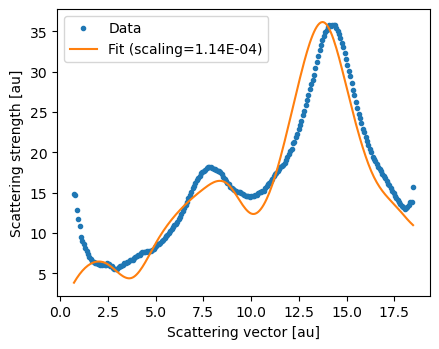

In [93]:
plt.figure(figsize=[4.5,3.6])
plt.plot(vector_data,strength_data,".",label="Data")
#plt.plot(vector_model,strength_model,".")
plt.plot(vector_data,model_interpolation_scaled(vector_data,result[0]),"-",label=r"Fit (scaling=%.2E)"%result[0][0])

plt.xlabel("Scattering vector [au]")
plt.ylabel("Scattering strength [au]")
plt.legend()
plt.tight_layout()